# Statistical Participants

## Introduction

Here we construct and pseudo-randomly shuffle stimuli and then consecutively sort these using computer-generated participants (CSPs). CSPs are defined by decision procedures in which shuffled stimuli are grouped according to trained relations, symmetry and adjacency in varying degrees.

## Code Steps

### Setup (Libraries and Set Seed)

Here we import required libraries (`random` for CSP calculations, `collections` for a tallying function, and `matplotlib` and `seaborn` for plotting). Note that we also set a `seed` for reproducibility of these results by investigators.

In [1]:
from random import sample, seed
seed(42)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
import seaborn as sns

### Generating Stimuli

Here we make a function that generates stimulus groups. These consist of sets of `k` consecutive numbers separated from each other by a large `gap` (although note the real gap = `gap - k`):

In [2]:
def generate_stimuli(group_size, num_groups, gap=100):
    return [ s + ( g * gap ) for g in range(num_groups) for s in range(1, group_size+1) ]

Example usage:

In [3]:
k, n = 4, 3
generate_stimuli(k, n)

[1, 2, 3, 4, 101, 102, 103, 104, 201, 202, 203, 204]

### Setting Simulation Parameters

We now establish the simulation parameters: `k`, `n`, number of SPs (`simlength`), a set of `stimuli` and two list variables (`n_prime` and `k_prime`) which collect together numbers of groups (per SP) and group sizes (concatenated after each SP run):

In [4]:
k, n, simlength = 4, 3, 1000
stimuli = generate_stimuli(k, n)
n_prime, k_prime = [], []

### Computer-Generated Participants

Let's now run the main simulation loop:

In [5]:
for _ in range(simlength):
    shuffled = sample(stimuli, len(stimuli))
    piles = [ [shuffled.pop(0)] ]

    for s in shuffled:
        seeking = True
        for p in piles:
            for i, v in enumerate(p):
                if seeking and ( 0 < abs(v - s) <= 1 ): #adjacent to that item in sublist
                    p.insert(i, s)
                    seeking = False
                    break
        if seeking:
            piles.append([s])
    n_prime.append(len(piles))
    k_prime.extend([len(x) for x in piles])

### Plot Results

We plot these results using the seaborn `countplot` convenience function which tabulates for us:

[Text(0.5, 0, 'group sizes across SPs'), Text(0, 0.5, 'number of instances')]

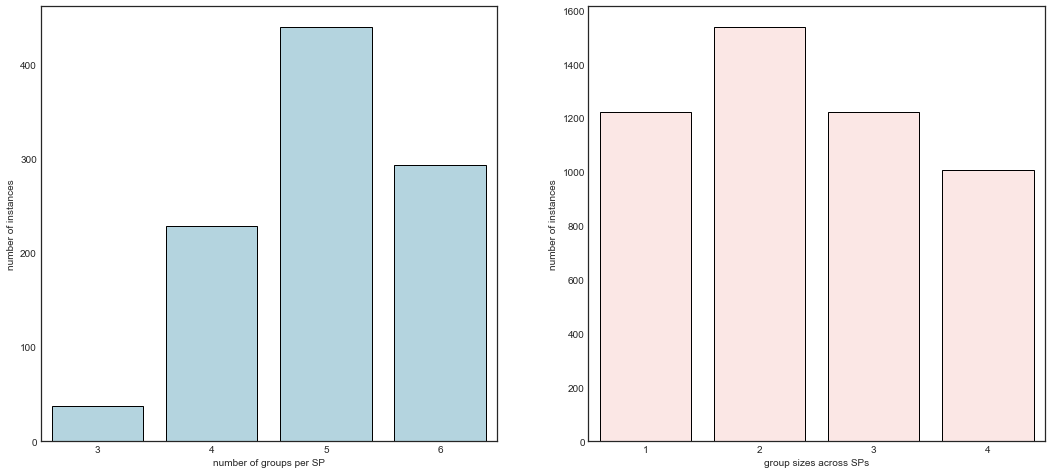

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18,8)) #dpi= 150

sns.countplot(x=n_prime, color="lightblue", edgecolor = "black", ax=axs[0])
axs[0].set(xlabel="number of groups per SP", ylabel="number of instances")

sns.countplot(x=k_prime, color="mistyrose", edgecolor = "black", ax=axs[1])
axs[1].set(xlabel="group sizes across SPs", ylabel="number of instances")

Let's just take a look at the last SP's results (for reassurance) also:

In [7]:
piles

[[102, 103, 104], [204, 202, 203], [3, 2, 1], [101], [201], [4]]

### Tabulating Data

In [8]:
n_table = Counter(n_prime)
n_table = sorted(n_table.items())

k_table = Counter(k_prime)
k_table = sorted(k_table.items())

print("n_prime data:")
print("  num_groups\t       #_SPs")
for kv in n_table:
    print("{0: 12}\t{1: 12}".format(kv[0], kv[1]))

print("\nk_prime data:")
print("  group_size\t    #_groups")
for kv in k_table:
    print("{0: 12}\t{1: 12}".format(kv[0], kv[1]))

n_prime data:
  num_groups	       #_SPs
           3	          37
           4	         229
           5	         440
           6	         294

k_prime data:
  group_size	    #_groups
           1	        1222
           2	        1538
           3	        1222
           4	        1009


## Toy Examples

These are included to aid understanding of the code.

In [9]:
stimuli

[1, 2, 3, 4, 101, 102, 103, 104, 201, 202, 203, 204]

In [10]:
shuffled = sample(stimuli, len(stimuli))
shuffled

[202, 201, 102, 3, 101, 1, 4, 2, 204, 203, 103, 104]

In [11]:
piles = [ [shuffled.pop(0)] ]
piles

[[202]]

In [12]:
shuffled

[201, 102, 3, 101, 1, 4, 2, 204, 203, 103, 104]

Main loop with diagnostic print statements:

In [13]:
for s in shuffled:
    seeking = True
    for p in piles:
        for i, v in enumerate(p):
            if seeking and ( 0 < abs(v - s) <= 1 ): #adjacent to that item in sublist
                print(f"HIT! stimulus: {s}, sublist: {p}", end ="")
                p.insert(i, s)
                seeking = False
                print(f", modified: {p}")
                break
    if seeking:
        piles.append([s])
        
n_prime = len(piles)
k_prime = [len(x) for x in piles]

HIT! stimulus: 201, sublist: [202], modified: [201, 202]
HIT! stimulus: 101, sublist: [102], modified: [101, 102]
HIT! stimulus: 4, sublist: [3], modified: [4, 3]
HIT! stimulus: 2, sublist: [4, 3], modified: [4, 2, 3]
HIT! stimulus: 203, sublist: [201, 202], modified: [201, 203, 202]
HIT! stimulus: 103, sublist: [101, 102], modified: [101, 103, 102]
HIT! stimulus: 104, sublist: [101, 103, 102], modified: [101, 104, 103, 102]


# Deprecated Methods

## Tabulation Methods

In [14]:
k_prime

[3, 4, 3, 1, 1]

In [15]:
k_values = sorted(set(k_prime))
k_numbers = [k_prime.count(x) for x in k_values]
k_values, k_numbers

([1, 3, 4], [2, 2, 1])

## Graphical Methods

In [16]:
#plt.rcParams["figure.figsize"] = (16,8)

In [17]:
#ax1.bar(n_values, n_numbers, color="lightblue", edgecolor = "black")
#ax1.set(xlabel="number of equivalence groups", ylabel="frequency")

#ax2.bar(k_values, k_numbers, color="mistyrose", edgecolor = "black")
#ax2.set(xlabel="equivalence group size", ylabel="frequency")